In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# Read csv data file
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [12]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [14]:
data.shape

(7920, 3)

In [16]:
# check data duplication
data.duplicated().sum()

0

In [18]:
# check null values
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [20]:
# Text Pre-Processing
import re
import string

In [24]:
data.head(5)

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [26]:
#convert uppercase to lowercase
data['tweet'] = data['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [28]:
data.head(5)

,id,label,tweet
0,1,0,#fingerprint #pregnancy test https://goo.gl/h1...
1,2,0,finally a transparant silicon case ^^ thanks t...
2,3,0,we love this! would you go? #talk #makememorie...
3,4,0,i'm wired i know i'm george i was made that wa...
4,5,1,what amazing service! apple won't even talk to...


In [30]:
# remove links using regression
data['tweet'] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [32]:
data.head(5)

,id,label,tweet
0,1,0,#fingerprint #pregnancy test #android #apps #...
1,2,0,finally a transparant silicon case ^^ thanks t...
2,3,0,we love this! would you go? #talk #makememorie...
3,4,0,i'm wired i know i'm george i was made that wa...
4,5,1,what amazing service! apple won't even talk to...


In [34]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [36]:
# Remove Punctuations
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text=text.replace(punctuation, '')
    return text

data['tweet'] = data['tweet'].apply(remove_punctuations)

In [38]:
data.head(5)

,id,label,tweet
0,1,0,fingerprint pregnancy test android apps beaut...
1,2,0,finally a transparant silicon case thanks to ...
2,3,0,we love this would you go talk makememories un...
3,4,0,im wired i know im george i was made that way ...
4,5,1,what amazing service apple wont even talk to m...


In [40]:
data.tail(5)

,id,label,tweet
7915,7916,0,live out loud lol liveoutloud selfie smile son...
7916,7917,0,we would like to wish you an amazing day make ...
7917,7918,0,helping my lovely 90 year old neighbor with he...
7918,7919,0,finally got my smart pocket wifi stay connecte...
7919,7920,0,apple barcelona apple store bcn barcelona trav...


In [44]:
# Remove numbers
data['tweet'] = data['tweet'].str.replace(r'\d+', '', regex=True)

In [46]:
data.tail(5)

,id,label,tweet
7915,7916,0,live out loud lol liveoutloud selfie smile son...
7916,7917,0,we would like to wish you an amazing day make ...
7917,7918,0,helping my lovely year old neighbor with her ...
7918,7919,0,finally got my smart pocket wifi stay connecte...
7919,7920,0,apple barcelona apple store bcn barcelona trav...


In [48]:
!pip install nltk

In [50]:
# Remove Stopwords
import nltk

In [52]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [54]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [56]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [58]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [60]:
data.head(5)

,id,label,tweet
0,1,0,fingerprint pregnancy test android apps beauti...
1,2,0,finally transparant silicon case thanks uncle ...
2,3,0,love would go talk makememories unplug relax i...
3,4,0,im wired know im george made way iphone cute d...
4,5,1,amazing service apple wont even talk question ...


In [62]:
# Stemming (get base word)
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [64]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [66]:
data.head(5)

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...


In [68]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


In [72]:
# can't indentify text values - convert into numerical values.
# create a unique words as a Vocabulary

In [76]:
# Building Vocabulary
from collections import Counter
vocab = Counter()

In [78]:
vocab

Counter()

In [80]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


In [84]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [86]:
vocab

Counter({'iphon': 4073,
         'appl': 2876,
         'samsung': 1395,
         'new': 1137,
         'phone': 1015,
         'follow': 885,
         'soni': 819,
         '…': 751,
         'ipad': 537,
         'rt': 525,
         'love': 499,
         'like': 455,
         'day': 426,
         'app': 416,
         'life': 415,
         'android': 414,
         'photo': 394,
         'get': 382,
         'io': 382,
         'galaxi': 361,
         'instagram': 358,
         'case': 348,
         'beauti': 322,
         'cute': 322,
         'gain': 311,
         'today': 309,
         'work': 306,
         'im': 294,
         'back': 294,
         'fuck': 293,
         'happi': 293,
         'photographi': 292,
         'game': 282,
         'got': 280,
         'fun': 277,
         'news': 265,
         'thank': 263,
         'music': 263,
         'time': 248,
         'make': 247,
         'updat': 236,
         'smile': 231,
         'instagood': 226,
         'funni': 223,
   

In [88]:
len(vocab)

15949

In [90]:
data.shape

(7920, 3)

In [94]:
# Reduce the feature amount to avoid over fitting
tokens = [key for key in vocab if vocab[key] > 10]

In [96]:
len(tokens)

1145

In [98]:
data.shape

(7920, 3)

In [100]:
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batt

In [102]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

In [104]:
# split train and test data set
X = data['tweet']
y = data['label']

In [106]:
X

0       fingerprint pregnanc test android app beauti c...
1       final transpar silicon case thank uncl yay son...
2       love would go talk makememori unplug relax iph...
3       im wire know im georg made way iphon cute dave...
4       amaz servic appl wont even talk question unles...
                              ...                        
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, Length: 7920, dtype: object

In [108]:
y

0       0
1       0
2       0
3       0
4       1
       ..
7915    0
7916    0
7917    0
7918    0
7919    0
Name: label, Length: 7920, dtype: int64

In [110]:
!pip install scikit-learn

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [120]:
X_train.shape

(6336,)

In [122]:
X_test.shape

(1584,)

In [124]:
y_train

5008    1
4726    0
276     0
1283    0
1423    0
       ..
7312    0
6043    0
1836    0
1643    0
3895    0
Name: label, Length: 6336, dtype: int64

In [126]:
y_test

5610    1
6230    0
547     0
3951    0
4416    0
       ..
6460    0
2546    0
2867    0
2114    0
3151    0
Name: label, Length: 1584, dtype: int64

In [128]:
X_train

5008    phone signal internet wifi steve job must haun...
4726    francocovidirector ciak video chicco sonyvideo...
276     new phone iphon iphon new phone mine silver wh...
1283    home captur soni arii june prtvseattl photowal...
1423    repost rsabdallah repostapp anoth custom custo...
                              ...                        
7312    happi summer sea blacksea girl funtim summer b...
6043    photo trauser violet time pic iphon summer liv...
1836    photo wow it’ time lollipop android happyday u...
1643        avail hoodi check … iphon case music discount
3895    soon mine babi ps amazon gamer extremelyhappi ...
Name: tweet, Length: 6336, dtype: object

In [130]:
X_test

5610    sister got ipad pray appl product domain pray ...
6230    studi right kindl fun picoftheday bestoftheday...
547     less hour left iphon countdown cantwait byeby ...
3951    travel poser tomorrow new adventur keyoftwo • ...
4416    wide awak awesom total unicorn appl beauti swe...
                              ...                        
6460    illlala followsunday followback rt teamfollowb...
2546          husband especi quot iphon pictur morn salam
2867    spank skate skate lide day weed spank iphoto i...
2114    gain follow rt must follow follow back follow ...
3151    final sun goneiphoneographi iphonesia instagra...
Name: tweet, Length: 1584, dtype: object

In [132]:
# should convert text values into numerical values (Vectorization)
def vectorizer(ds, vocabulary):
    vectorized_lst = []

    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1

        vectorized_lst.append(sentence_lst)

    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)

    return vectorized_lst_new

In [134]:
vectorized_x_train = vectorizer(X_train, tokens)

In [136]:
vectorized_x_test = vectorizer(X_test, tokens)

In [138]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [142]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [146]:
# check balanced or imbalanced dataset
y_train.value_counts()

label
0    4696
1    1640
Name: count, dtype: int64

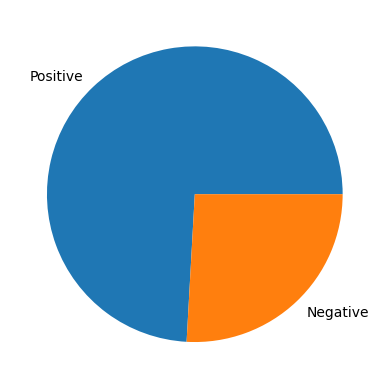

In [148]:
#check using matplotlib
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [150]:
!pip install imbalanced-learn

In [154]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9392, 1145) (9392,)


In [158]:
y_train_smote.value_counts()

label
1    4696
0    4696
Name: count, dtype: int64

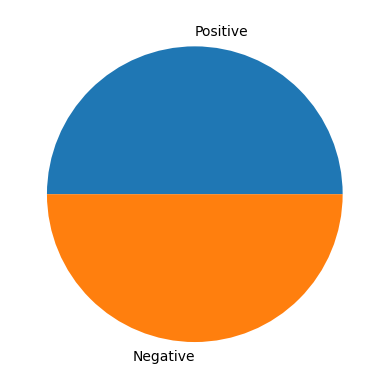

In [160]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [162]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [164]:
y_train_smote

0       1
1       0
2       0
3       0
4       0
       ..
9387    1
9388    1
9389    1
9390    1
9391    1
Name: label, Length: 9392, dtype: int64

In [166]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [168]:
y_test

5610    1
6230    0
547     0
3951    0
4416    0
       ..
6460    0
2546    0
2867    0
2114    0
3151    0
Name: label, Length: 1584, dtype: int64


# Modal Building and Evaluation

In [175]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [177]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')


## Logistic Regression

In [199]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)
training_scores(y_train_smote, y_train_pred)

y_test_pred = lr.predict(vectorized_x_test)
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.939
	Precision = 0.914
	Recall = 0.969
	F1-Score = 0.94
Testing Scores:
	Accuracy = 0.881
	Precision = 0.704
	Recall = 0.881
	F1-Score = 0.783


## Naive Bayes

In [203]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)
training_scores(y_train_smote, y_train_pred)

y_test_pred = mnb.predict(vectorized_x_test)
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.906
	Precision = 0.867
	Recall = 0.961
	F1-Score = 0.911
Testing Scores:
	Accuracy = 0.867
	Precision = 0.66
	Recall = 0.94
	F1-Score = 0.776


## Decision Trees

In [206]:
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)
training_scores(y_train_smote, y_train_pred)

y_test_pred = dt.predict(vectorized_x_test)
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.836
	Precision = 0.658
	Recall = 0.681
	F1-Score = 0.669


## Random Forest

In [209]:
rf = RandomForestClassifier()
rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)
training_scores(y_train_smote, y_train_pred)

y_test_pred = rf.predict(vectorized_x_test)
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.881
	Precision = 0.743
	Recall = 0.78
	F1-Score = 0.761


## Support Vector Machine Classifier

In [212]:
svm = SVC()
svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)
training_scores(y_train_smote, y_train_pred)

y_test_pred = svm.predict(vectorized_x_test)
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.979
	Precision = 0.963
	Recall = 0.997
	F1-Score = 0.98
Testing Scores:
	Accuracy = 0.888
	Precision = 0.737
	Recall = 0.837
	F1-Score = 0.784


In [214]:
import pickle
with open('../static/model.pickle', 'wb') as file:
    pickle.dump(lr, file)